In [ ]:
"""
共分散行列に対する固有値問題であり、固有ベクトルが主成分方向の単位ベクトルとなっている。

主成分方向の各次元の直交性を考慮すると、特異値分解によって解ける
"""


'\n共分散行列に対する固有値問題であり、固有ベクトルが主成分方向の単位ベクトルとなっている。\n\n主成分方向の各次元の直交性を考慮すると、特異値分解によって解ける\n'

# 新しいセクション

In [ ]:
# ワインのデータ準備
from google.colab import files

uploaded = files.upload()


Saving winequality-red.csv to winequality-red.csv


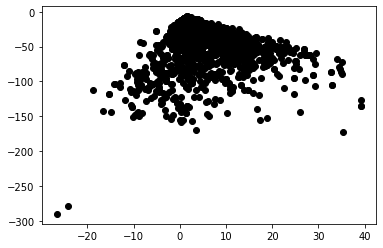

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds

class PCA:
  # コンストラクタの必須引数は圧縮後の次元数。SVD計算のために、誤差許容のトレランスとVの初期値を指定。
  def __init__(self, n_components, tol=0.0, random_seed=0):
    self.n_components = n_components
    self.tol = tol
    self.random_state_ = np.random.RandomState(random_seed)
  
  def fit(self, X):
    v0 = self.random_state_.randn(min(X.shape))
    xbar = X.mean(axis=0)
    Y = X - xbar
    S = np.dot(Y.T, Y) # 共分散行列
    U, Sigma, VT = svds(S, k=self.n_components, tol=self.tol, v0=v0)
    self.VT_ = VT
  
  def transform(self, X):
    return self.VT_.dot(X.T).T

import matplotlib.pyplot as plt
import csv


# データ読み込み
Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)
X = Xy[:, :-1]

# 学習
model = PCA(n_components=2)
model.fit(X)

# 変換
Y = model.transform(X)

# 描画
plt.scatter(Y[:, 0], Y[:, 1], color="k")
plt.show()

